# ML Exercise: Predicting  Housing Prices

## Getting Started
In this exercise, you will tackel the problem of predicting housing pirices. This model can be usefull for someone like a real estate agent who could make use of such information on a daily basis.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this exercise.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore")
## for data
import numpy as np
import pandas as pd
import math

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## for statistical tests
import scipy

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the  housing dataset
data = pd.read_csv('housing-full.csv')
print ('Housing dataset has {0} data points with {1} variables each'.format(*data.shape))
data.head()

Housing dataset has 506 data points with 14 variables each


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV (target)     Median value of owner-occupied homes in $1000's

In [3]:
prices = data['medv']
features = data.drop('medv', axis = 1)

X= features.values
y = prices.values

## Data Exploration
the following code displayes histograms of each feature

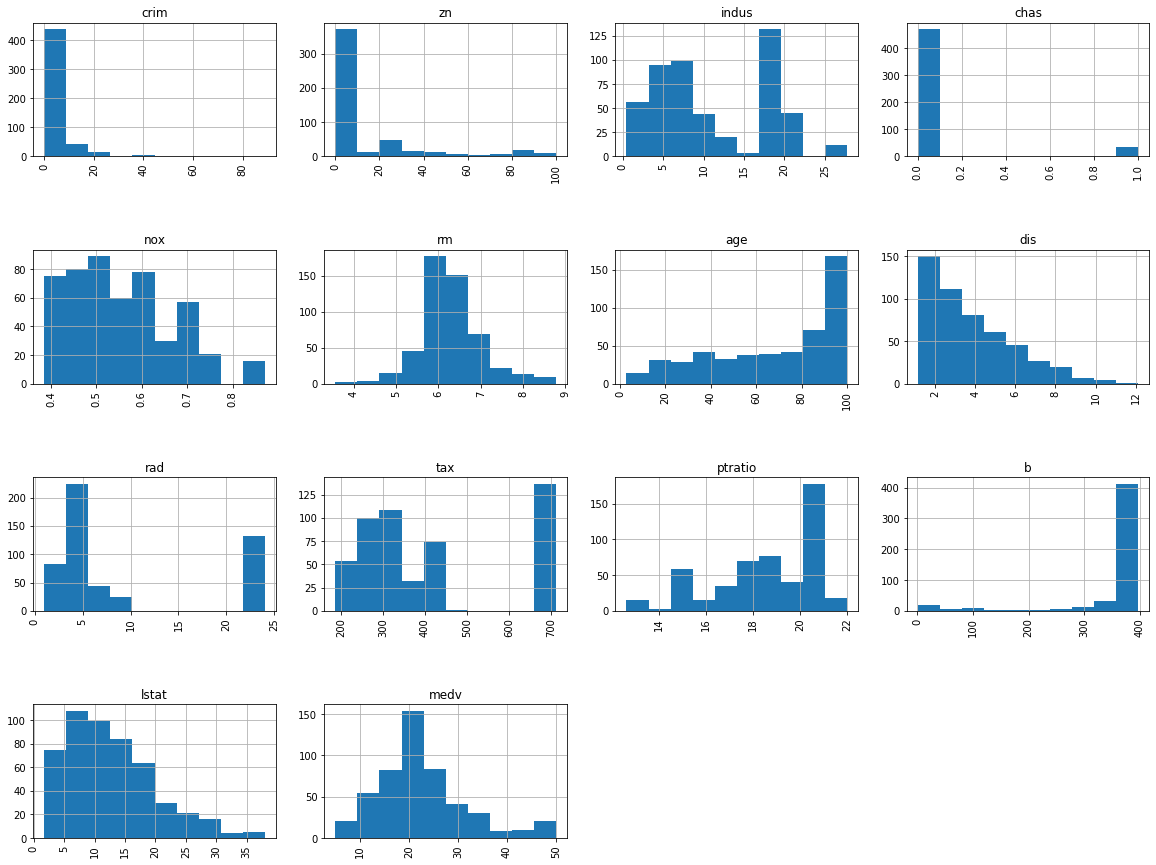

In [4]:
fig = plt.figure(figsize=(20,15))
cols = 4
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

It is relevant to look at the distribution of the target, so let's do that attribuite individually.

In [ ]:
sns.distplot(prices);

**Question**<br>
what kind of distribution does the target has? why?

In [ ]:
### YOUR ANSWER HERE   ###
normal distribution

## Data Visualization
we want to visualize our multi-dimentional data using PCA

**Question** fit your data using `PCA` with `n_components=2`, transform `X` to 2 dimentional array (`principalComponents` )

In [ ]:
from sklearn.decomposition import PCA
### your code here

model = PCA(n_components=2)
principalComponents =model.fit_transform(X)

###
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, prices], axis = 1)

In [7]:
finalDf.head()

,principal component 1,principal component 2,medv
0,-119.818843,-5.560056,24.0
1,-168.890155,10.116209,21.6
2,-169.311707,14.080532,34.7
3,-190.230642,18.302463,33.4
4,-190.133451,16.097947,36.2


In [10]:

# Creating dataset
z_ax = prices
x_ax = finalDf['principal component 1']
y_ax = finalDf['principal component 2']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.scatter3D(x_ax, y_ax, z_ax, color = "green")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Prices')
# show plot
plt.show()

ValueError: Unknown projection '3d'

<Figure size 720x504 with 0 Axes>

----

## Developing a Model
In this section of the exercise, you will develop the tools and techniques necessary for a model to make a prediction. 

### Define a Performance Metric

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `mean_squared_error` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`
- print the results.

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# one of them***********************

def performance_metric(y_true, y_predict):
    """ Calculates and prints the performance score between 
        true and predicted values based on two metrics re_score
        and mean_squared_error. """
    
    ### your code here
    #calc the score
    mse = mean_squared_error(y_true, y_predict)
    r2 = r2_score(y_test, y_predict)
    print("Mean squared error : {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict)))
    print("r2_score : {:.2f}".format(r2_score(y_test, y_predict)))

    #
    # print the score
    print('\tmse is ', mse)
#     print('\r2 is ', r2)
    
    
    return 

In [ ]:
performance_metric()

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of `10`. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [13]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state=10)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


**Question**- Training and Testing<br>
*What could go wrong with splitting such small data set? what is the alternative?*

In [14]:
### YOUR ANSWER H
overfitting
we can use insteade of splitting the cross validation

SyntaxError: invalid syntax (<ipython-input-14-f042b485a844>, line 3)

### Training and testing basic fucntion
For the code cell below, you will need to implement the following function:
- Use `X_train` and `y_train` to fit the `model`.
- test your model and print the result on *both* of training and test data using `performance_metric` function.

In [15]:
from sklearn.linear_model import LinearRegression


def fit_and_eval_model(model, X_train, X_test, y_train, y_test):
    m= model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    performance_metric(y_test,y_predict)
    
    ### your code here
    return 



### Baseline Model: LinearRegression
Use `fit_and_eval_model` to fit and evalute simple `LinearRegression` as a baseline model, 

In [20]:
### your code here
linreg = LinearRegression()
fit_and_eval_model(linreg,X_train, X_test, y_train, y_test)

Mean squared error : 34.41
r2_score : 0.67
	mse is  34.413968453138565


**Question**- Evaluating the Model Results<br>
*looking at the results, how do you know that the model is underfitting? what are your options to make it better (in general)*

In [ ]:
### YOUR ANSWER HERE
because the mean squared error is high wich means squared difference of target & predicted values is high
so its underfitting
options is to increase data or change the model

### Feature selection
apply feature selection using `RFE`, use `LinearRegression` as your estimator, where the `n_features_to_select` is 6
- print how many features left
- fit and evaluate using  the seleced featues.
- did the model imporve? does it under or over fit?

In [32]:
from sklearn.feature_selection import RFE
### your code here
select = RFE(LinearRegression(),
             n_features_to_select=6)

select.fit(X_train, y_train)
mask = select.get_support()

print(mask)
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LinearRegression()
m = score.fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
fit_and_eval_model(score,X_train_rfe,X_test_rfe,y_train, y_test)
print("Test score: {:.3f}".format(m))


[False False False  True  True  True False  True False False  True False
  True]
Mean squared error : 30.93
r2_score : 0.70
	mse is  30.932335106173824
Test score: 0.704


C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:167: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.bool)
C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:168: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details 

In [33]:
features.columns[select.get_support()]

Index(['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat'], dtype='object')

In [35]:
fit_and_eval_model(LinearRegression(),X_train_rfe,X_test_rfe, y_train, y_test)

Mean squared error : 30.93
r2_score : 0.70
	mse is  30.932335106173824


In [ ]:
#### Your answer here
overfit

### More Complex Model: Pipline
train your model with `LinearRegression` using the following pipline:
  - feature selection
  - MinMaxScaler
  - PolynomialFeatures with degree=2
  - LinearRegression

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

### your code here
model = make_pipeline(select,MinMaxScaler(),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [38]:
fit_and_eval_model(model,X_train,X_test,y_train, y_test)

Mean squared error : 14.99
r2_score : 0.86
	mse is  14.987423905838934


C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:167: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.bool)
C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:168: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details 

**Question** is it better?

In [ ]:
### your answer here
yes

----

## Analyzing Model Performance
In this section of the exercise, you'll take a look at several models' learning and testing performances on training data. 

### Learning Curves
The following pricture shows four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Answer the following question.

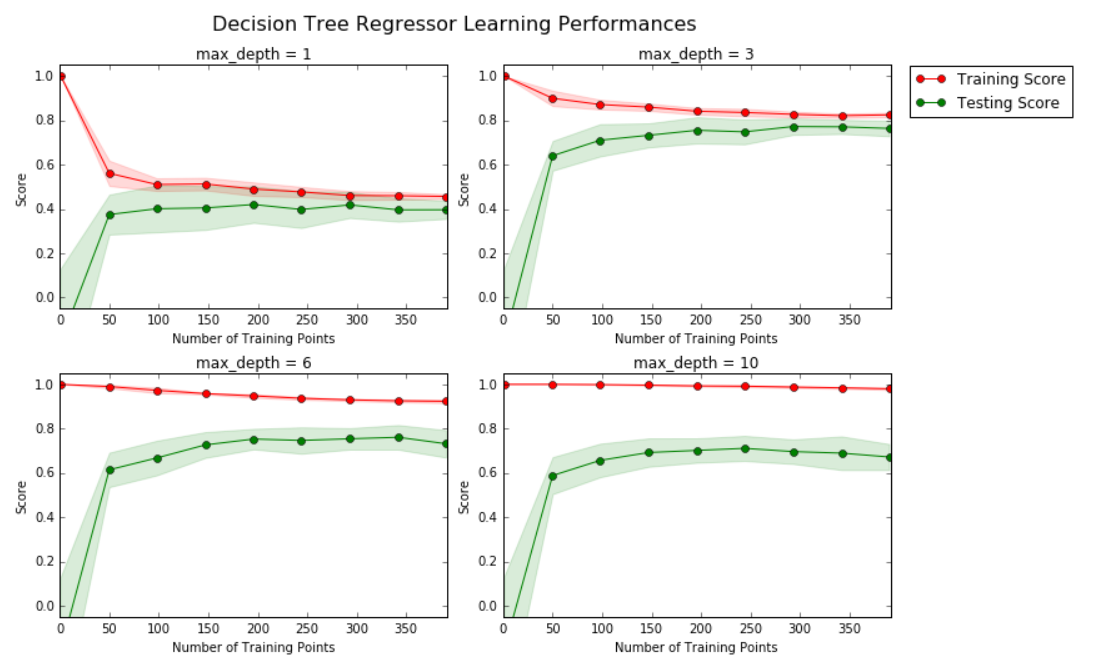

### Question: Learning the Data
For each of the above situations answer the following questions:
- is it High Bias, High Variance or Ideal 
- is it usefull to add more data?

In [ ]:
### YOUR ANSWER HERE
1 - high bias ,not useful to add more data
2 - good fit ,not useful to add more data
3 - high variance , useful to add more data
4 - high variance , useful to add more data

-----

## Model Selection and Evaluation
In this final section of the exercise, you will construct a multible model and make a prediction on the client's feature set using different learning models.

###  Grid Search on Decsion Tree Model

Train a the same pipline but using the **decision tree model**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize:
- `'max_depth'` parameter for the DecisionTreeRegressor, values range form 1 to 11 .
- `'n_features_to_select'` parameter for the RFE, values range form 4 to 9 .
- `'degree'` parameter for the PolynomialFeatures, values range form 1 to 11 .

what are the best params?<br>
what the best score (mse)?

**Using GridSearchCV**

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel


# your code here

pip_model = make_pipeline(RFE(LinearRegression(),n_features_to_select=6),
              PolynomialFeatures(),
              DecisionTreeRegressor())


param_grid = {'decisiontreeregressor__max_depth': np.arange(1,11),
              'selectfrommodel__threshold': ['mean','median'],
              'polynomialfeatures__degree': np.arange(1,4)}

grid = GridSearchCV(pip_model, param_grid)

grid.fit(X,y)

In [43]:
help('sklearn.model_selection.GridSearchCV')

Help on class GridSearchCV in sklearn.model_selection:

sklearn.model_selection.GridSearchCV = class GridSearchCV(BaseSearchCV)
 |  sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to impleme

In [45]:
grid.fit(X_train, y_train)

C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy

ValueError: Invalid parameter polynomialfeatures for estimator RFE(estimator=GridSearchCV(cv='warn', error_score='raise-deprecating',
                           estimator=DecisionTreeRegressor(criterion='mse',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort=False,
                                                           random_state=None,
                                                           splitter='best'),
                           iid='warn', n_jobs=None,
                           param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
                           pre_dispatch='2*n_jobs', refit=True,
                           return_train_score=False, scoring=None, verbose=0),
    n_features_to_select=4, step=1, verbose=0). Check the list of available parameters with `estimator.get_params().keys()`.

###  Ensemble Model: AdaBoostRegressor

fit and evaluate a the same pipline but using the `AdaBoostRegressor`. with `n_estimators` set to 100 
((  `RFE`'s`n_features_to_select` is `6`  ) `PolynomialFeatures`'s `degree` is 2)

In [52]:
from sklearn.ensemble import AdaBoostRegressor
### your code here

# model = make_pipeline(PolynomialFeatures(degree=2),
#                       AdaBoostRegressor(n_estimators=100))

# X_train_rfe = select.transform(X_train)
# X_test_rfe = select.transform(X_test)
m = AdaBoostRegressor(model,n_estimators=100)
fit_and_eval_model(m,X_train_rfe,X_test_rfe,y_train,y_test)

Mean squared error : 13.22
r2_score : 0.87
	mse is  13.220220386715287


now let's choose the best degree for `PolynomialFeatures` by ploting the `validation_curve` using degree range up to 7.
what is the optimal degree? is it your best model?

In [ ]:
from sklearn.model_selection import validation_curve

### your code here
degree = np.arange(7)

N, train_lc, val_lc = validation_curve(model,X, y,param_name= 'polynomialfeatures__degree',
                                          param_range = degree, cv=7)

ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc='best')

C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\EVO store\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy

In [ ]:
#### your answer here
